<a href="https://colab.research.google.com/github/andvar95/Inteligencia-Artificial/blob/main/Irisexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This example use Iris dataset included in scikit learn library to train a MLPClassifier model, and so, observe clasification zone for each class. 

Este ejemplo use los datos Iris incluidos en la librería sickit learn para entrenar un modelo MLP (Perceptrón Multicapa), y así, observar la zona de clasificación para cada clase. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

It loads Iris dataset, this contents a features that consist in four values sepal length, sepal widht, petal length and petal width all theses in cm and its labels. 

Se Carga el cojunto de datos IRIS, este contiene una características que consiste en cuatro valores longitud del sepalo, ancho del sepalo, longitud petalo, ancho del petalo todos estos en cm y sus etiquetas. 

In [ ]:
# import Iris data 
iris = datasets.load_iris()
iris


{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

It only uses two first features so as to can graph the points, mereover, it extracts the labels

Solo se usan las dos primeras características para poder graficar los puntos, además, se extraen  las características

In [ ]:
X = iris.data[:, :2]
y = iris.target
colors = "bry"
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

The dataset are shuffled  and it's used 'randon.seed()' to always select the same indexes when the algorithm is executed

Los datos son barajados y es usado 'randon.seed' para que siempre seleccione los mismo indices cuando el algoritmo es ejecutado.

In [ ]:
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

The data training are standardized, substracting data mean and dividing by data standard deviation 

Los datos de entrenamiento son normalizados, restando la media de los datos y dividiendo por la desviación estandar

In [ ]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

The training model is created using 'lbfgs' solver because dataset isn't so large, 'logistic' activation function, 3000 epochs,  shuffling the data

El modelo de entrenamiento es creado usando el solucionador 'lbfgs' debido a que el conjunto de dato no es tan extenso,300 épocas y barajando los daos

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=3000,solver='lbfgs',shuffle=True,activation='logistic',verbose=True).fit(X, y)

This section create the mesh to plot considering a point above maximum value and  a point below minimum value

Se crea  el plano para graficar considerando un punto por encima del valor máximo y uno por debajo del valor mínimo

In [ ]:
h = .02  # step size in the mesh/Tamaño cuadricula en el plano
# create a mesh to plot in/ Se crea el plano para graficar
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


The boundary decision is created, a color is assigned to each class  and putting the result in a color plot

La frontera de decisión es creada, un color es asignado a cada clase y colocando el resultado en una gráica a color 

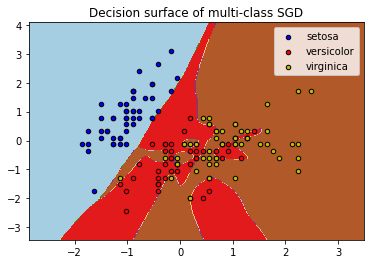

In [ ]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')



'''The training points are plotted'''

for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')
plt.legend()
plt.show()